In [4]:
import psycopg2
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
from collections import defaultdict

# User Input Required

In [9]:
#Enter Regional Benchmark Name
region_name = 'Yorkshire and The Humber'

#Enter Local Authority Benchmark Name
local_authority_name = 'Leeds'

#Enter list of LSOAs for the study area
study_area_lsoa_list = ["E01011478", "E01011479", "E01011481", "E01011482", "E01011483",
    "E01011284", "E01011355", "E01011357", "E01011358", "E01011360",
    "E01011361", "E01011363", "E01011440", "E01011441", "E01011442",
    "E01011443", "E01011444", "E01011445", "E01011446", "E01011447",
    "E01011448", "E01011449", "E01011450", "E01011451", "E01011668",
    "E01011669", "E01011670", "E01011671", "E01011678", "E01011681",
    "E01011691", "E01011693", "E01033002", "E01033003", "E01033005",
    "E01033006", "E01033008", "E01033010", "E01033011", "E01033013",
    "E01033015", "E01033016", "E01033031", "E01033035", "E01032946"
]


#Enter file path for saving images
image_path=r'N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs'

# 1. Connect to Geodatabase

In [3]:
# --- DB connection params ---
conn_params = {
    'host': 'PRIORPSRV03',
    'port': 5432,
    'dbname': 'gis',    
}

# --- Connect to Postgres ---
conn = psycopg2.connect(**conn_params)

# 2. Run SQL query to retrive required data

In [4]:
import pandas as pd

# --- Define the single-layer query (choose the layer you want to load) ---
query = """
SELECT *
FROM uk_new.mhclg_index_of_multiple_deprivation
"""

# --- Load the result into DataFrame ---
uk_deprivation = pd.read_sql_query(query, conn)
conn.close()

# --- Final preview ---
uk_deprivation.head()

C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,lsoa11cd,lsoa11nm_x,geometry,lsoa21cd,lsoa21nm,lad22cd,lad22nm,rgn22cd,rgn22nm,data_source,data_resolution,data_time_period,data_web_link,area_ha,lsoa11nm_y,lad19cd,lad19nm,index_of_multiple_deprivation_score,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile,income_score,income_rank,income_decile,employment_score,employment_rank,employment_decile,education_skills_and_training_score,education_skills_and_training_rank,education_skills_and_training_decile,health_deprivation_and_disability_score,health_deprivation_and_disability_rank,health_deprivation_and_disability_decile,crime_score,crime_rank,crime_decile,barriers_to_housing_and_services_score,barriers_to_housing_and_services_rank,barriers_to_housing_and_services_decile,living_environment_score,living_environment_rank,living_environment_decile,income_deprivation_affecting_children_index_score,income_deprivation_affecting_children_index_rank,income_deprivation_affecting_children_index_decile,income_deprivation_affecting_older_people_score,income_deprivation_affecting_older_people_rank,income_deprivation_affecting_older_people_decile,children_and_young_people_sub_domain_score,children_and_young_people_sub_domain_rank,children_and_young_people_sub_domain_decile,adult_skills_sub_domain_score,adult_skills_sub_domain_rank,adult_skills_sub_domain_decile,geographical_barriers_sub_domain_score,geographical_barriers_sub_domain_rank,geographical_barriers_sub_domain_decile,wider_barriers_sub_domain_score,wider_barriers_sub_domain_rank,wider_barriers_sub_domain_decile,indoors_sub_domain_score,indoors_sub_domain_rank,indoors_sub_domain_decile,outdoors_sub_domain_score,outdoors_sub_domain_rank,outdoors_sub_domain_decile,index_of_multiple_deprivation_rank_2010,index_of_multiple_deprivation_rank_2015,income_rank_2015,employment_rank_2015,education_skills_and_training_rank_2015,health_deprivation_and_disability_rank_2015,crime_rank_2015,barriers_to_housing_and_services_rank_2015,living_environment_rank_2015,income_deprivation_affecting_children_index_rank_2015,income_deprivation_affecting_older_people_rank_2015,children_and_young_people_sub_domain_rank_2015,adult_skills_sub_domain_rank_2015,geographical_barriers_sub_domain_rank_2015,wider_barriers_sub_domain_rank_2015,indoors_sub_domain_rank_2015,outdoors_sub_domain_rank_2015,imd_rank_change_2010_2015,imd_rank_change_2015_2019,imd_rank_trend_2010_2019,income_rank_change_2015_2019,employment_rank_change_2015_2019,education_rank_change_2015_2019,health_rank_change_2015_2019,crime_rank_change_2015_2019,barriers_to_housing_rank_change_2015_2019,living_environment_rank_change_2015_2019,income_affecting_children_rank_change_2015_2019,income_affecting_elderly_rank_change_2015_2019,children_and_young_people_rank_change_2015_2019,adult_skills_rank_change_2015_2019,geographical_barriers_rank_change_2015_2019,wider_barriers_rank_change_2015_2019,indoors_rank_change_2015_2019,outdoors_rank_change_2015_2019,income_rank_trend_2015_2019,employment_rank_trend_2015_2019,education_rank_trend_2015_2019,health_rank_trend_2015_2019,crime_rank_trend_2015_2019,barriers_to_housing_rank_trend_2015_2019,living_environment_rank_trend_2015_2019,income_affecting_children_rank_trend_2015_2019,income_affecting_elderly_rank_trend_2015_2019,children_and_young_people_rank_trend_2015_2019,adult_skills_rank_trend_2015_2019,geographical_barriers_rank_trend_2015_2019,wider_barriers_rank_trend_2015_2019,indoors_rank_trend_2015_2019,outdoors_rank_trend_2015_2019,total_population_2022,dependent_children_aged_0_15_2022,older_population_aged_65_and_over_2022,working_population_16_64_2022,total_students,age_4_under_count,age_5_15_count,age_16_17_count,age_18_20_count,age_21_24_count,age_25_29_count,age_30_over_count,age_18_and_above_count
0,E01000117,Barnet 010A,0106000020346C00000100000001030000000100000019...,E01000117,Barnet 010A,E09000003,Barnet,E12000007,London,"Ministry of Housing, Communities & Local Gover...",LSOA 2011,2010-2019,https://www.gov.uk/governmen

In [10]:
uk_deprivation.columns.to_list()

['lsoa11cd',
 'lsoa11nm_x',
 'geometry',
 'lsoa21cd',
 'lsoa21nm',
 'lad22cd',
 'lad22nm',
 'rgn22cd',
 'rgn22nm',
 'data_source',
 'data_resolution',
 'data_time_period',
 'data_web_link',
 'area_ha',
 'lsoa11nm_y',
 'lad19cd',
 'lad19nm',
 'index_of_multiple_deprivation_score',
 'index_of_multiple_deprivation_rank',
 'index_of_multiple_deprivation_decile',
 'income_score',
 'income_rank',
 'income_decile',
 'employment_score',
 'employment_rank',
 'employment_decile',
 'education_skills_and_training_score',
 'education_skills_and_training_rank',
 'education_skills_and_training_decile',
 'health_deprivation_and_disability_score',
 'health_deprivation_and_disability_rank',
 'health_deprivation_and_disability_decile',
 'crime_score',
 'crime_rank',
 'crime_decile',
 'barriers_to_housing_and_services_score',
 'barriers_to_housing_and_services_rank',
 'barriers_to_housing_and_services_decile',
 'living_environment_score',
 'living_environment_rank',
 'living_environment_decile',
 'income_

In [5]:
# save as csv so no need to run SQL query again to save time
uk_deprivation.to_csv(r"N:\Geodatabase\Geodatabase Query Exports\derprivation.csv", index=False)

In [5]:
#reload data from csv
uk_deprivation = pd.read_csv(r"N:\Geodatabase\Geodatabase Query Exports\derprivation.csv")

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import textwrap

def wrap_labels(ax, width):
    labels = [textwrap.fill(label.get_text(), width) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0)

def bar_chart_percentage_of_population(
    df,
    x_fields,
    y_fields,
    filter_values,
    chart_title='Population Composition by Area Type',
    x_axis_label='Area Type',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_y_offset=-0.3,
    legend_location='upper center',
    legend_location_x=0.5,
    legend_location_y=-0.25,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=10,
    save_image=False,
    image_path='.',
    image_name='population_percent_chart_wrapped.png',
    dpi=300
):
    # Compute percentages for each y_field per x_field filter
    summary_data = {y: [] for y in y_fields}
    for x_field in x_fields:
        filtered_df = df[df[x_field].isin(filter_values)]
        for y_field in y_fields:
            filtered_sum = filtered_df[y_field].sum()
            total_y = df[y_field].sum()  # Unfiltered total for this y_field
            percent = (filtered_sum / total_y) * 100 if total_y != 0 else 0
            summary_data[y_field].append(percent)

    # Assemble DataFrame
    summary_df = pd.DataFrame(summary_data, index=x_fields)
    summary_df.index = [field.replace('_', ' ').title() for field in summary_df.index]

    fallback_palette = [
        '#ff7fbc', '#b53189', '#9c7cc9', '#2d1f70', '#8ebce6',
        '#d5e4f2', '#B7A6FF', '#88FFB8', '#292627',
        '#fcb0d9', '#c25a9b', '#a8a5e0', '#3f2e86', '#a7d1ef',
        '#b4a0d9', '#5d4482', '#cdeff0', '#dee6f8', '#6d758d'
    ]
    if not color_palette:
        color_palette = fallback_palette[:len(y_fields)]

    y_label = '% of Population'

    plt.rcParams['font.family'] = font_family
    fig, ax = plt.subplots(figsize=(image_width, image_height), facecolor=background_color)
    ax.set_facecolor(background_color)

    summary_df.plot(kind='bar', ax=ax, color=color_palette, width=0.75, edgecolor='none')

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > label_threshold:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,
                    f"{height:.1f}%",
                    ha='center',
                    va='bottom',
                    color='white',
                    fontsize=label_fontsize,
                    fontweight=label_fontweight
                )

    ax.set_xlabel(x_axis_label, fontsize=axis_label_fontsize, color='white', labelpad=10)
    ax.set_ylabel(y_label, fontsize=axis_label_fontsize, color='white')
    ax.set_title(chart_title, fontsize=title_fontsize, color='white', pad=20)
    ax.tick_params(axis='x', labelsize=tick_fontsize, colors='white', rotation=0)
    ax.tick_params(axis='y', labelsize=tick_fontsize, colors='white')

    wrap_labels(ax, width=14)

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(False)

    legend = ax.legend(
        title=legend_title,
        title_fontsize=legend_title_fontsize if legend_title else None,
        fontsize=legend_fontsize,
        loc=legend_location,
        bbox_to_anchor=(legend_location_x, legend_location_y),
        ncol=legend_ncol,
        frameon=False,
        labelcolor=legend_label_colour
    )

    new_labels = [
        label.replace('_', ' ').replace('2022', '').strip().capitalize()
        for label in summary_df.columns
    ]
    for text, new_label in zip(legend.get_texts(), new_labels):
        text.set_text(new_label)
        text.set_color(legend_label_colour)

    if legend.get_title():
        legend.get_title().set_color(legend_label_colour)

    plt.tight_layout()

    if save_image:
        os.makedirs(image_path, exist_ok=True)
        full_path = os.path.join(image_path, image_name)
        plt.savefig(full_path, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
        print(f"Chart saved to: {full_path}")

    plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import textwrap

def wrap_labels(ax, width):
    labels = [textwrap.fill(label.get_text(), width) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0)

def bar_chart_percent_by_group(
    df,
    x_field,
    y_fields,
    filter_values=None,
    chart_title='Population Composition by Group',
    x_axis_label='Group',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_location='upper center',
    legend_location_x=0.5,
    legend_location_y=-0.25,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=10,
    save_image=False,
    image_path='.',
    image_name='group_percent_chart.png',
    dpi=300
):
    group_values = sorted(df[x_field].dropna().unique())
    if filter_values:
        group_values = [v for v in group_values if v in filter_values]

    summary_data = {y: [] for y in y_fields}
    for value in group_values:
        subset = df[df[x_field] == value]
        for y_field in y_fields:
            filtered_sum = subset[y_field].sum()
            total_y = df[y_field].sum()  # Unfiltered total for this y_field
            percent = (filtered_sum / total_y) * 100 if total_y != 0 else 0
            summary_data[y_field].append(percent)

    # Format group labels for x-axis
    summary_df = pd.DataFrame(summary_data, index=[str(v) for v in group_values])

    fallback_palette = [
        '#ff7fbc', '#b53189', '#9c7cc9', '#2d1f70', '#8ebce6',
        '#d5e4f2', '#B7A6FF', '#88FFB8', '#292627',
        '#fcb0d9', '#c25a9b', '#a8a5e0', '#3f2e86', '#a7d1ef',
        '#b4a0d9', '#5d4482', '#cdeff0', '#dee6f8', '#6d758d'
    ]
    if not color_palette:
        color_palette = fallback_palette[:len(y_fields)]

    y_label = '% of Total per Variable'

    plt.rcParams['font.family'] = font_family
    fig, ax = plt.subplots(figsize=(image_width, image_height), facecolor=background_color)
    ax.set_facecolor(background_color)

    summary_df.plot(kind='bar', ax=ax, color=color_palette, width=0.75, edgecolor='none')

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > label_threshold:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,
                    f"{height:.1f}%",
                    ha='center',
                    va='bottom',
                    color='white',
                    fontsize=label_fontsize,
                    fontweight=label_fontweight
                )

    ax.set_xlabel(x_axis_label, fontsize=axis_label_fontsize, color='white', labelpad=10)
    ax.set_ylabel(y_label, fontsize=axis_label_fontsize, color='white')
    ax.set_title(chart_title, fontsize=title_fontsize, color='white', pad=20)
    ax.tick_params(axis='x', labelsize=tick_fontsize, colors='white', rotation=0)
    ax.tick_params(axis='y', labelsize=tick_fontsize, colors='white')

    wrap_labels(ax, width=14)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(False)

    legend = ax.legend(
        title=legend_title,
        title_fontsize=legend_title_fontsize if legend_title else None,
        fontsize=legend_fontsize,
        loc=legend_location,
        bbox_to_anchor=(legend_location_x, legend_location_y),
        ncol=legend_ncol,
        frameon=False,
        labelcolor=legend_label_colour
    )

    new_labels = [
        label.replace('_', ' ').replace('2022', '').strip().capitalize()
        for label in summary_df.columns
    ]
    for text, new_label in zip(legend.get_texts(), new_labels):
        text.set_text(new_label)
        text.set_color(legend_label_colour)

    if legend.get_title():
        legend.get_title().set_color(legend_label_colour)

    plt.tight_layout()

    if save_image:
        os.makedirs(image_path, exist_ok=True)
        full_path = os.path.join(image_path, image_name)
        plt.savefig(full_path, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
        print(f"Chart saved to: {full_path}")

    plt.show()

In [10]:
# 1. england_df_cleaned where rgn22nm is not null
england_df = uk_deprivation[uk_deprivation['rgn22nm'].notnull()]

# 2. region_df where rgn22nm = "Yorkshire and The Humber"
region_df = uk_deprivation[uk_deprivation['rgn22nm'] == region_name]

# 3. leeds_df where lad22nm = "Leeds"
leeds_df = uk_deprivation[uk_deprivation['lad22nm'] == local_authority_name]

# 4. study_area_df where lsoa21cd is in a specific list
study_area_df = uk_deprivation[uk_deprivation['lsoa21cd'].isin(study_area_lsoa_list)]


# Population per deprivation domain

Chart saved to: N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs\Population living in deprived areas.png


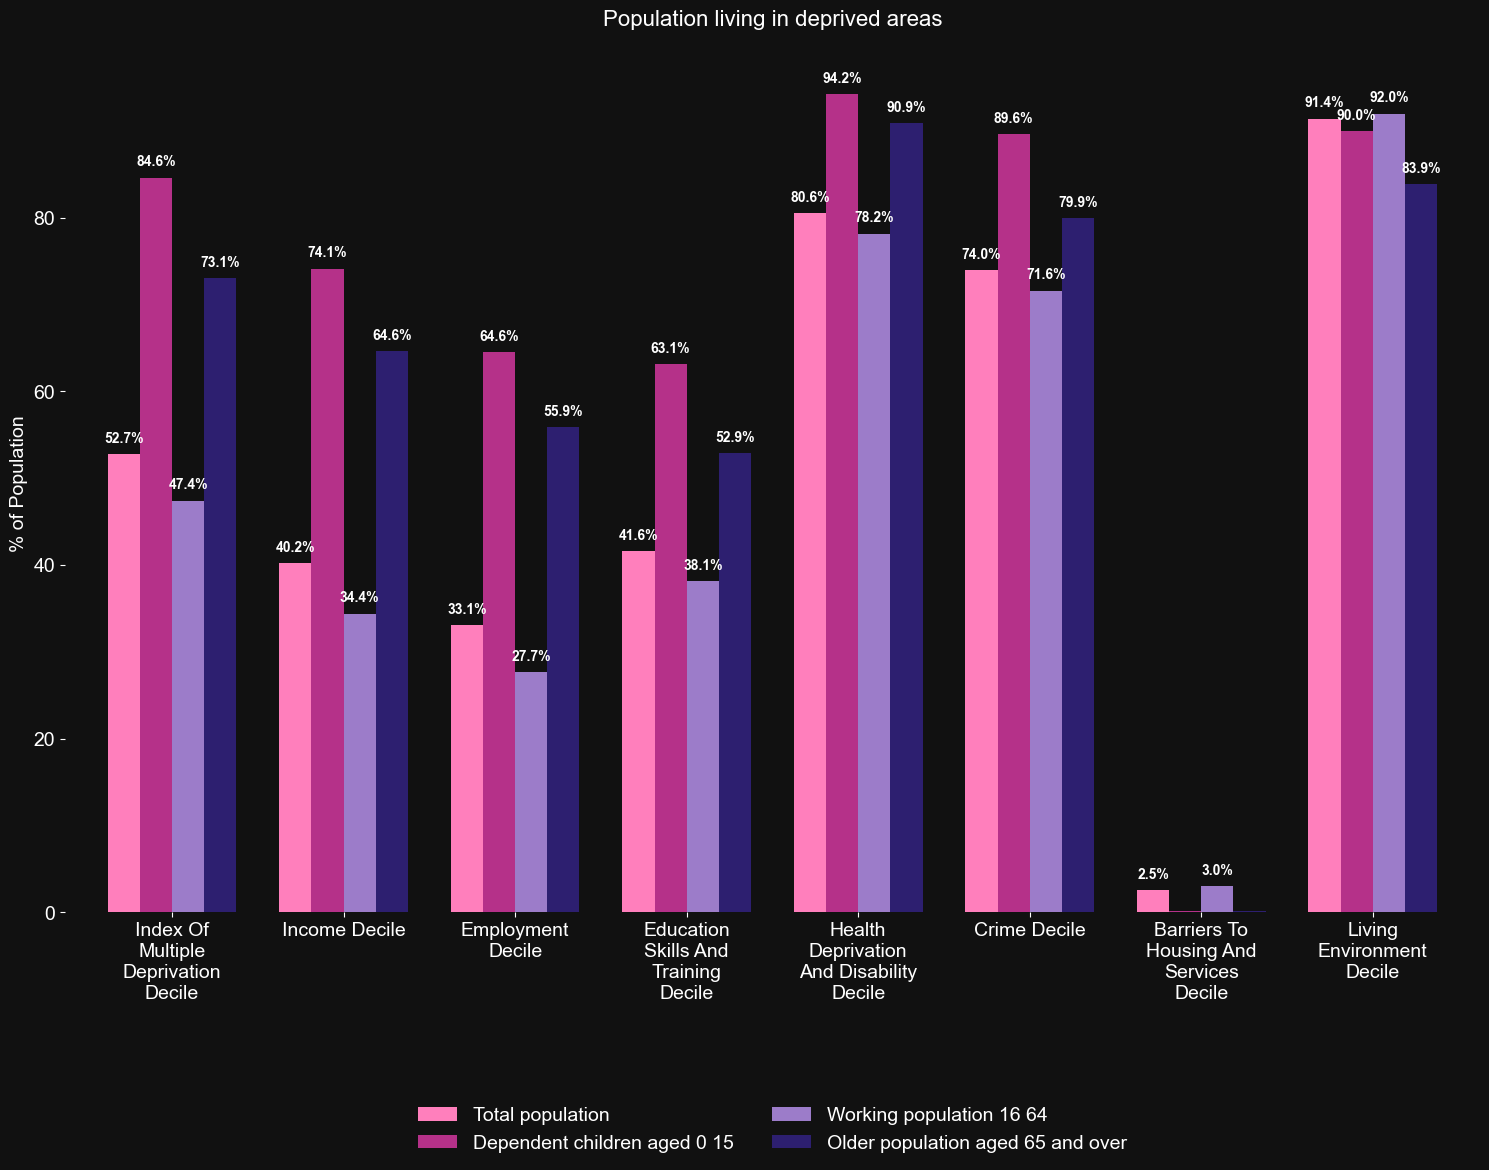

In [12]:
x_fields = ['index_of_multiple_deprivation_decile',
            'income_decile',
            'employment_decile',
            'education_skills_and_training_decile',
            'health_deprivation_and_disability_decile',
            'crime_decile',
            'barriers_to_housing_and_services_decile',
            'living_environment_decile'
]

y_fields = ['total_population_2022',
            'dependent_children_aged_0_15_2022',
            'working_population_16_64_2022',
            'older_population_aged_65_and_over_2022',
]

filter_values=[1, 2, 3]

bar_chart_percentage_of_population(
    study_area_df,
    x_fields,
    y_fields,
    filter_values,
    chart_title='Population living in deprived areas',
    x_axis_label=' ',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=10,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_y_offset=-0.3,
    legend_location='lower center',
    legend_location_x=0.5,
    legend_location_y=-0.3,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=12,
    save_image=True,
    image_path=image_path,
    image_name='Population living in deprived areas.png',
    dpi=300
)

Chart saved to: N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs\Population living in deprived areas_Sub Domains.png


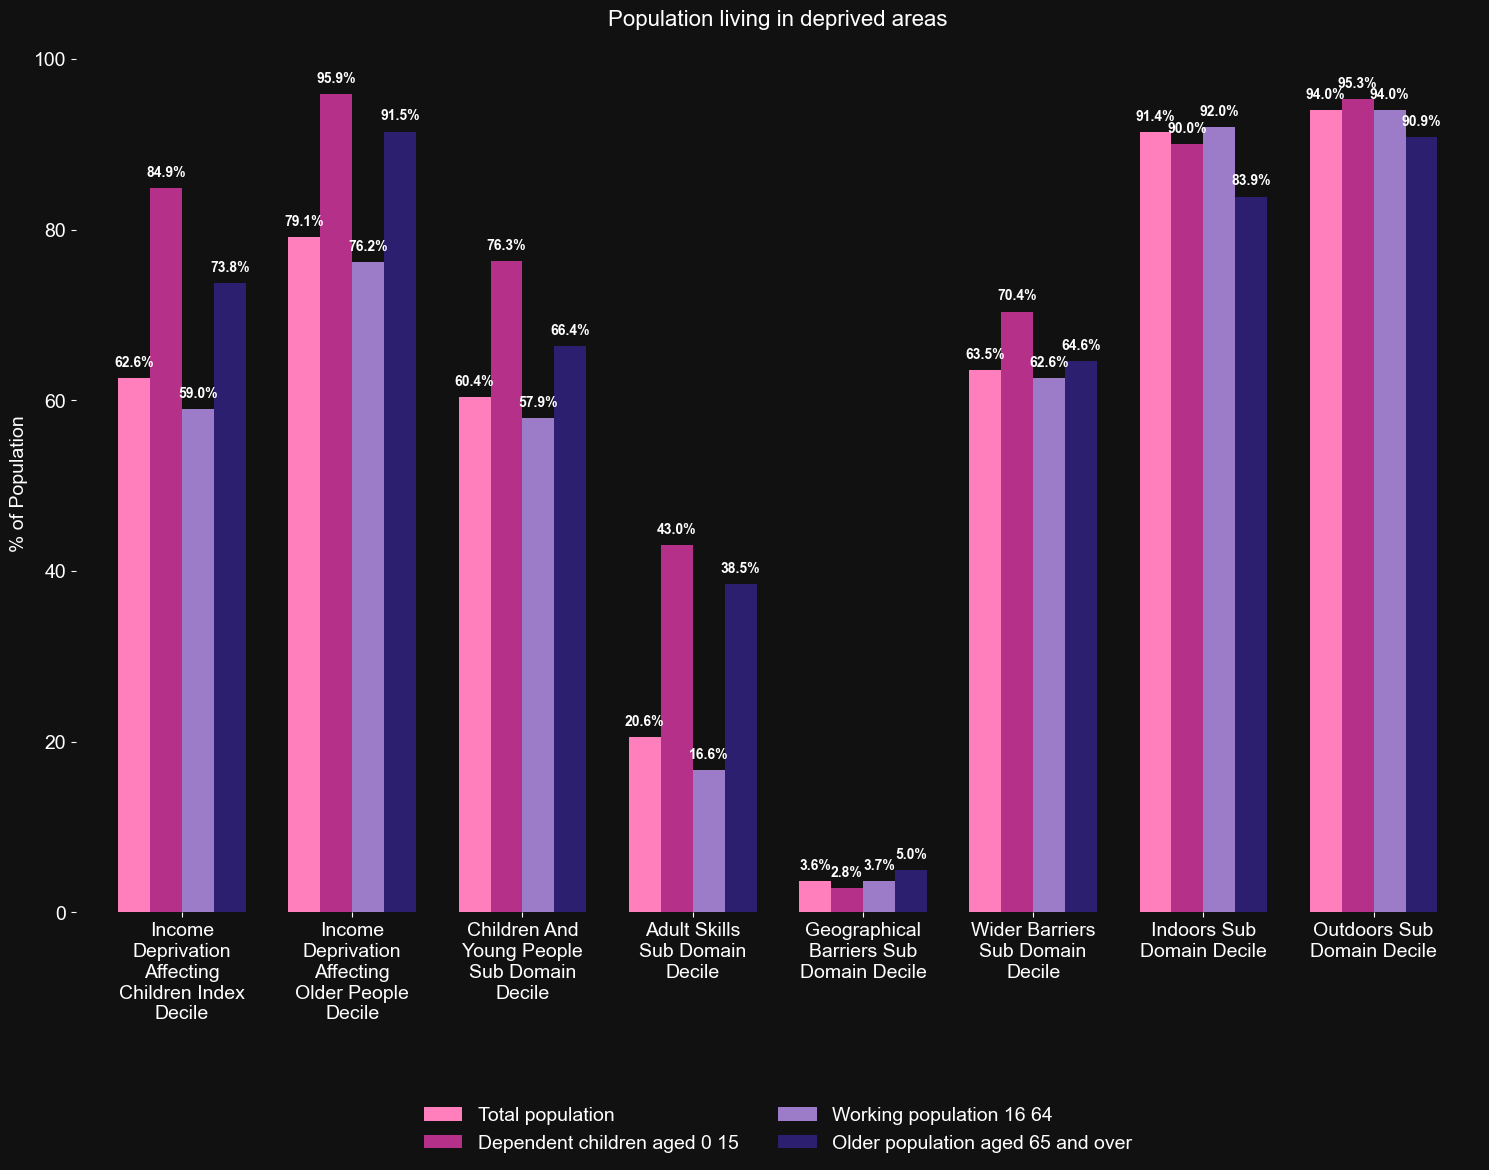

In [13]:
x_fields = ['income_deprivation_affecting_children_index_decile',
        'income_deprivation_affecting_older_people_decile',
        'children_and_young_people_sub_domain_decile',
        'adult_skills_sub_domain_decile',
        'geographical_barriers_sub_domain_decile',
        'wider_barriers_sub_domain_decile',
        'indoors_sub_domain_decile',
        'outdoors_sub_domain_decile',
]

y_fields = ['total_population_2022',
            'dependent_children_aged_0_15_2022',
            'working_population_16_64_2022',
            'older_population_aged_65_and_over_2022',
]

filter_values=[1, 2, 3]

bar_chart_percentage_of_population(
    study_area_df,
    x_fields,
    y_fields,
    filter_values,
    chart_title='Population living in deprived areas',
    x_axis_label=' ',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=10,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_y_offset=-0.3,
    legend_location='lower center',
    legend_location_x=0.5,
    legend_location_y=-0.3,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=12,
    save_image=True,
    image_path=image_path,
    image_name='Population living in deprived areas_Sub Domains.png',
    dpi=300
)

# Population per deprivation trend

Chart saved to: N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs\Spatio-temporal-trend of Population living in deprived areas.png


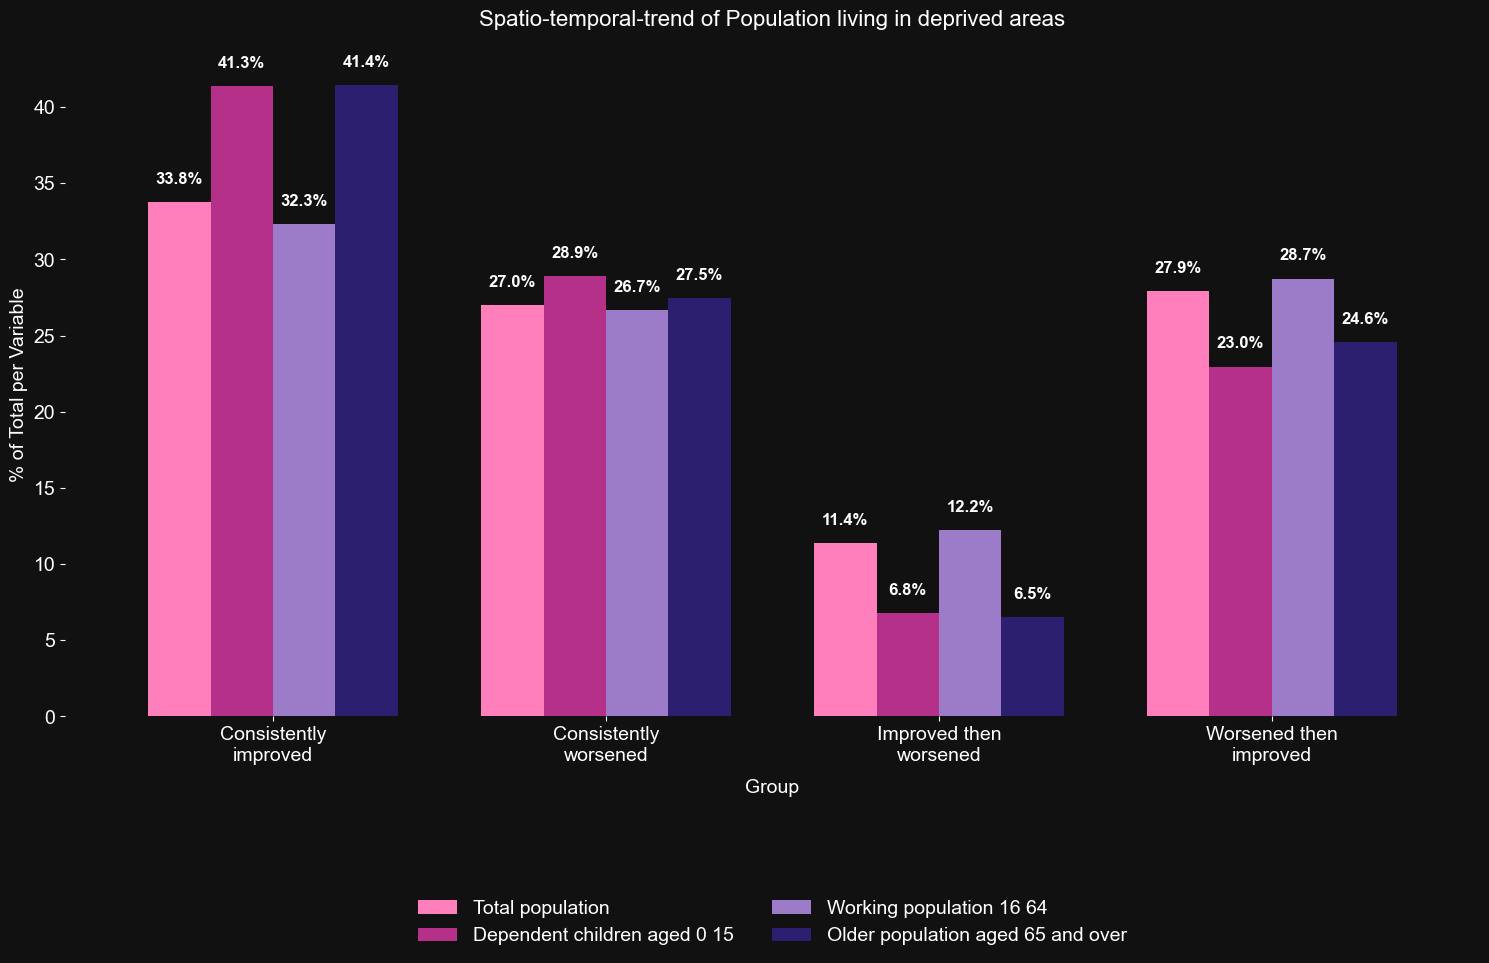

In [24]:
x_field = 'imd_rank_trend_2010_2019'


y_fields = ['total_population_2022',
            'dependent_children_aged_0_15_2022',
            'working_population_16_64_2022',
            'older_population_aged_65_and_over_2022',
]

bar_chart_percent_by_group(
    study_area_df,
    x_field,
    y_fields,
    filter_values=None,
    chart_title='Spatio-temporal-trend of Population living in deprived areas',
    x_axis_label='Group',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_location='upper center',
    legend_location_x=0.5,
    legend_location_y=-0.25,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=10,
    save_image=True,
    image_path=image_path,
    image_name='Spatio-temporal-trend of Population living in deprived areas.png',
    dpi=300
)

# Population per Education domain

Chart saved to: N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs\Population living in areas deprived in education, skills and training.png


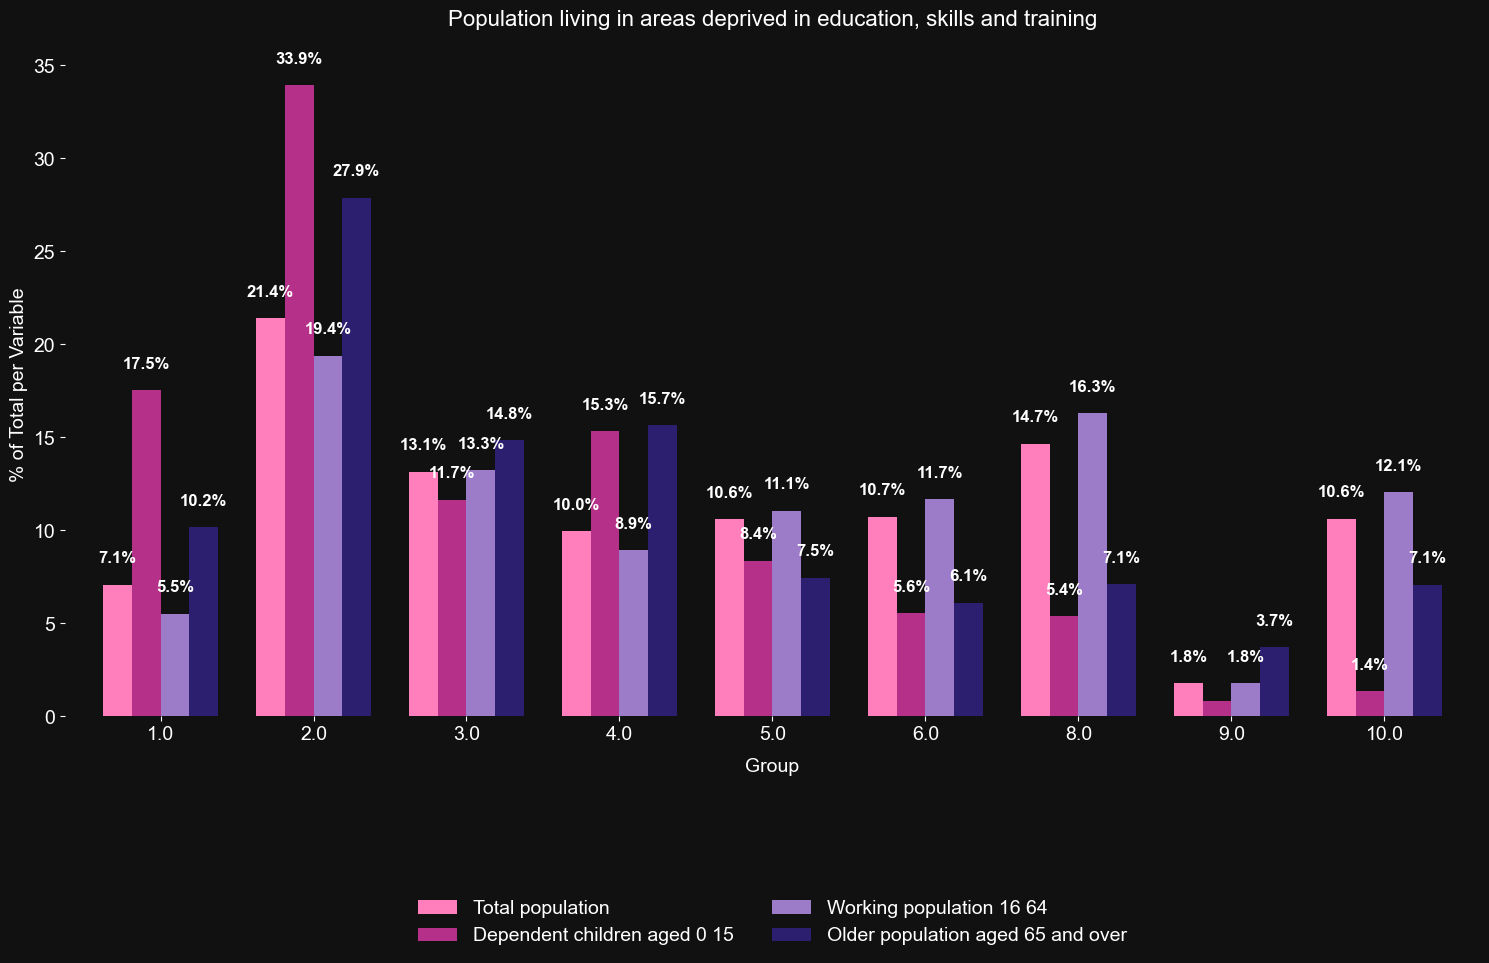

In [26]:
x_field = 'education_skills_and_training_decile'


y_fields = ['total_population_2022',
            'dependent_children_aged_0_15_2022',
            'working_population_16_64_2022',
            'older_population_aged_65_and_over_2022',
]

bar_chart_percent_by_group(
    study_area_df,
    x_field,
    y_fields,
    filter_values=None,
    chart_title='Population living in areas deprived in education, skills and training',
    x_axis_label='Group',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_location='upper center',
    legend_location_x=0.5,
    legend_location_y=-0.25,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=10,
    save_image=True,
    image_path=image_path,
    image_name='Population living in areas deprived in education, skills and training.png',
    dpi=300
)

Chart saved to: N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs\Population living in areas deprived in education, skills and training.png


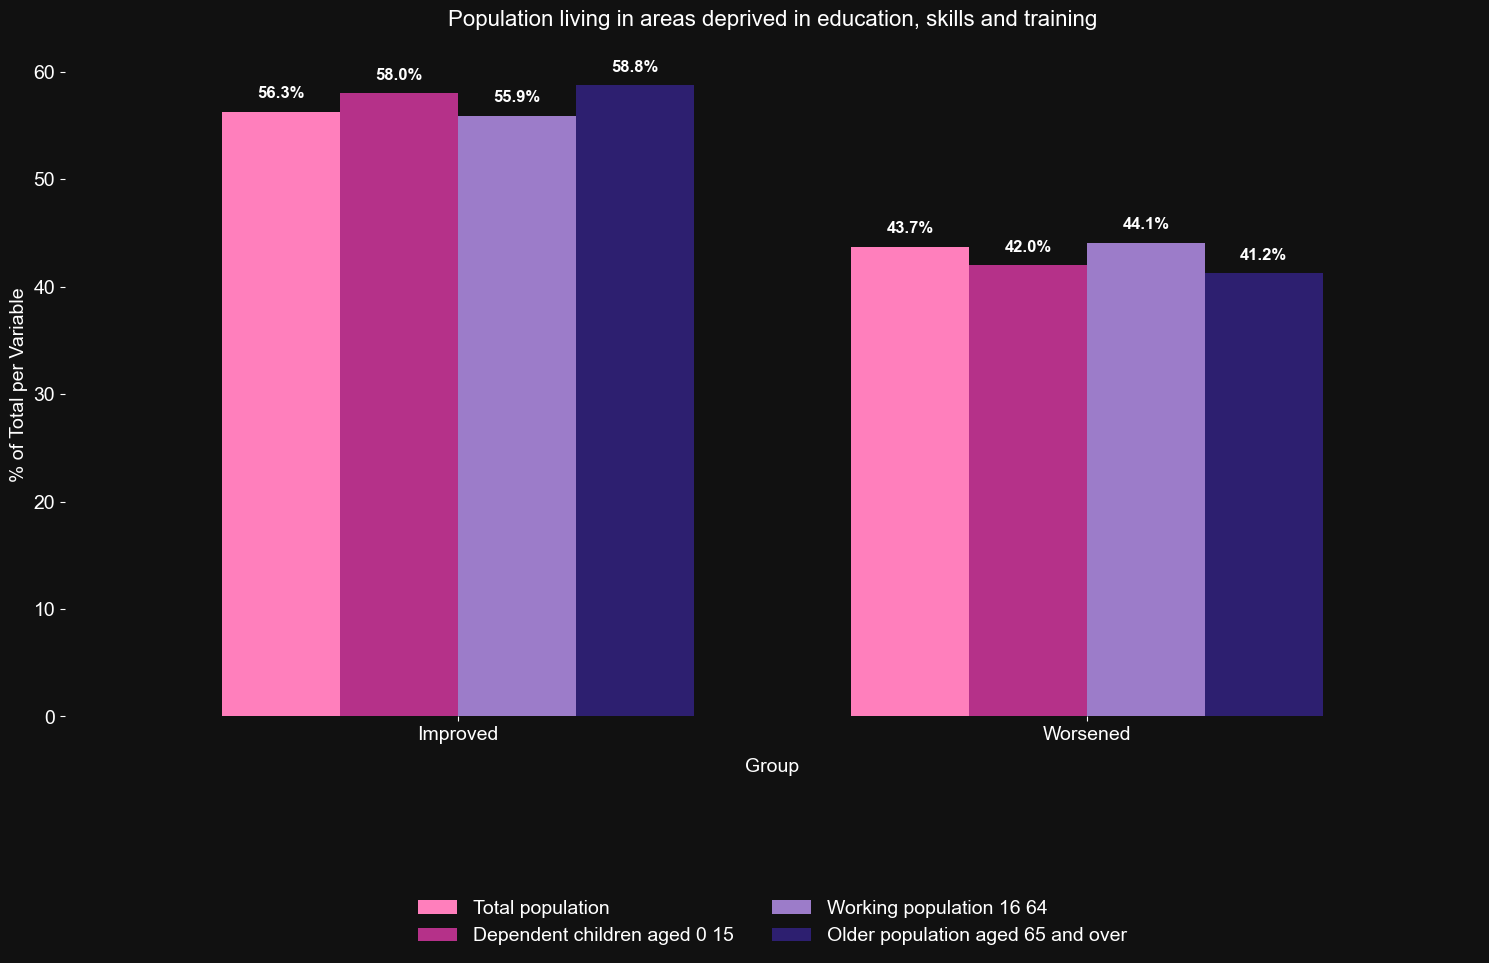

In [28]:
x_field = 'education_rank_trend_2015_2019'


y_fields = ['total_population_2022',
            'dependent_children_aged_0_15_2022',
            'working_population_16_64_2022',
            'older_population_aged_65_and_over_2022',
]

bar_chart_percent_by_group(
    study_area_df,
    x_field,
    y_fields,
    filter_values=None,
    chart_title='Population living in areas deprived in education, skills and training',
    x_axis_label='Group',
    color_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=2,
    legend_location='upper center',
    legend_location_x=0.5,
    legend_location_y=-0.25,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=1,
    image_width=15,
    image_height=10,
    save_image=True,
    image_path=image_path,
    image_name='Population living in areas deprived in education, skills and training.png',
    dpi=300
)